In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = sns.load_dataset("penguins")

df.shape

(344, 7)

# Heatmaps 

In many areas, we usually end up having lots of variables and interdependencies that we might be interested in. On `Day 1` we used `pandas` and its `.corr()` functionality to derive a `correlation matrix` from our 🐧 datatable. 


If we want to visualize those correlations, we can for example use `heatmaps`.

[Heatmaps in Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) take rectangular data and return a color coded matrix, ie. we can directly use the output of `df.corr()` as input in `sns.heatmap()`



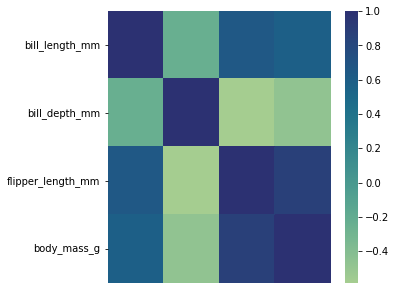

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), xticklabels=False, cmap='crest') # no xtickslabel, since the correlation matrix is symmetric

This looks nice, however the colormap `crest` might not be an ideal choice, as our data contains `positive` and `negative` values, we better use a `diverging` color palette.

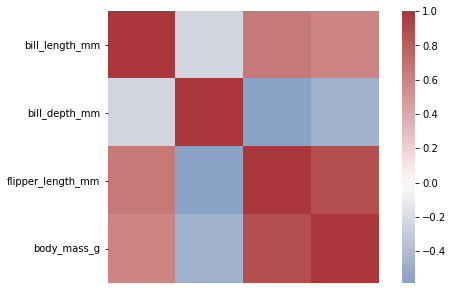

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), xticklabels=False, cmap='vlag', center=0, square=True) # try to find a diverging colorpalette for seaborn and set center=0

This is already very informative, but sometimes it is even better to `annotate` heatmaps for example with the `correlation values`.

Try to update our `heatmap` from above and annotate the correlation values rounded to 3 decimals. 

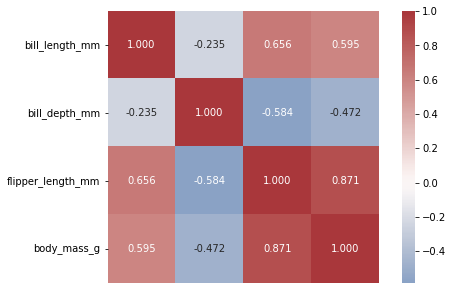

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), xticklabels=False, cmap='vlag', center=0, square=True, annot=True,
            fmt=".3f") 

If you want to change the `fontcolor`, `fontsize`, `orientation` etc of your annotations, check the 
`annot_kws` keyword arguments for [matplotlib.axes.Axes.text()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text), or [here](https://stackoverflow.com/questions/72168450/changing-annotation-text-color-in-seaborn-heat-map). 


-----

------

For the 🐧 dataframe our `y-ticks-labels` are perfectly aligned, but sometimes, especially if you have a lot of variables, your labels might get messed up. For this it is often useful to `rotate` and `align` your tick-labels manually. For that we can for example directly use the `pyplot` interface, again proving that we can have full control about pretty much all objects in our plot.

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

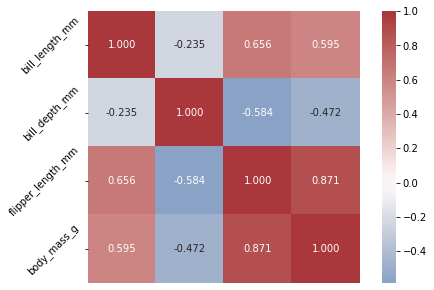

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), xticklabels=False, cmap='vlag', center=0, square=True, annot=True,
            fmt=".3f")

plt.yticks(rotation=45, ha='right', va="center") # ha= horizontal alignment, va= vertical alignment 

A nice extensions to `heatmaps` are `clustermaps`, which add a `hierarchical clustering` to your heatmap and thus rearranges your cells to clusters. Compare the `clustermap` result to the heatmap one above! For more info on the clustermap, see e.g., [here](https://pythontic.com/visualization/seaborn/clustermap)



<Figure size 360x288 with 0 Axes>

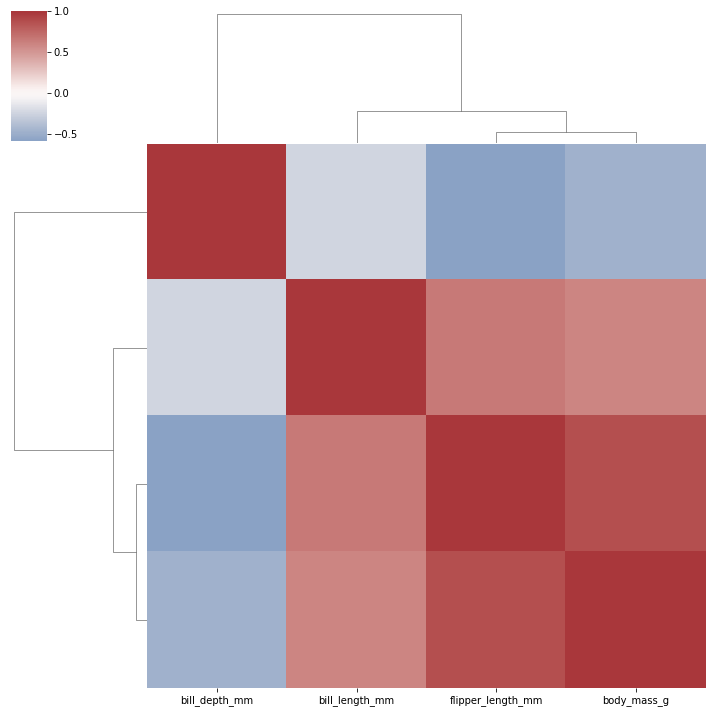

In [ ]:
plt.figure(figsize=(5,4))
sns.clustermap(df.corr(), yticklabels=False, cmap='vlag', center=0,
               row_cluster=True)

## try to plot a clustermap with no yticklabels, your color palette centered at 0 and showing clusters both on the columns and rows 
## combine to your heatmap 

# Saving figures 

Usually we are creating figures for talks or papers - for the latter, journals often ask us to provide high resolution figures (e.g., `scalable vector graphics, SVG`) with a specific number of `dots per inch, DPI`.

Saving a file can be done as easy as `plt.savefig("filename")`. This functionality also allows us to specify the file format and the DPI, allowing to save high-resolution figures. 



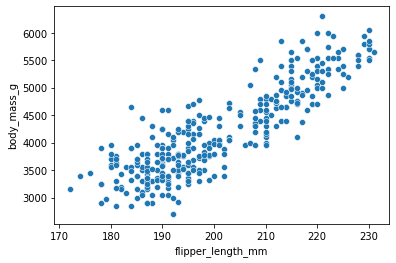

In [ ]:
sns.scatterplot(data=df, x="flipper_length_mm", y="body_mass_g")

## 1. try to save a 

plt.savefig("scatter.svg", dpi=300, format="svg") #save plot to working directory


# Note: an object-oriented approach would also allow to do:
# my_plot = plt.figure()
# my_plot.savefig("filename.svg")

# Downloading files from google Colab

Since our current working directory is in google colab, we need to download the files to our local machine. 

- First let´s use the `os` module to check which files are currently written to our working dir
- Afterwards, we can download the file in a very similar way as we did for the upload in session 1. 


Note: If you want to download multiple files at the same time, one needs to do a little [workaround](https://predictivehacks.com/?all-tips=how-to-download-files-and-folders-from-colab) 

In [ ]:
import os

os.listdir() #shows files in current working directory

['.config', 'scatter.svg', 'sample_data']

In [ ]:
from google.colab import files

files.download("scatter.svg") # we need to specify the filename
# this file should now be in your Downloads folder on your local machine
# SVG can be opened with Google Chrome for example 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feel free to compare a `figure.png` with a `figure.svg`, especially if you zoom into your plot! 

# The End 🎉


![](https://i.imgflip.com/6vp5c6.jpg)
